## Part A: Analysing Text Data

 ### Step 01: Import `pyspark` and initialize `Spark`

In [1]:
import re     
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

##### Libraries used for this assignment


**re**-Library imported for making use of regular expressions for matching expressions and using regular expression functions like re.sub();

**nltk.corpus**-Library that accesses the stopwords corpus for the removal of stopwords;


**matplotlib.pyplot**- Library for plotting visulaizations for data analysis purposes;


**numpy**- Library used for manipulation and mathematical operations on arrays;


**matplotlib.patches**- Library used for plotting the legend on the graphs. 

In [2]:
# create entry points to Spark
from pyspark import SparkContext  # Main entry point for Apache Spark functionality
from pyspark.sql import SparkSession

# We add this line to avoid an error : "Cannot run multiple SparkContexts at once". 
# If there is an existing spark context, we will reuse it else create a new Spark context. 
sc = SparkContext.getOrCreate()


#appName: Sets an application name which is displayed in the spark UI, if no appName set random name generated.
# master: Sets the Spark master to run locally, local[*] means the master will run on all logical cores available.

# If there is no existing spark context, we now create a new context
if (sc is None):
    sc = SparkContext(master="local[*]", appName="FIT5202-Assignment_1_Task_A")
    spark = SparkSession(sparkContext=sc)

In [3]:
 #the application UI is accessible through the link displayed in the output of the object .
sc     

<SparkContext master=local[*] appName=pyspark-shell>

### Step 02: Create Resilient Distributed Datasets `(RDDs)`

In [4]:
#Create an rdd by reading the text document into the rdd and in order to display the entire
#document .collect() is used. Book1 Agile Processes is extracted.
book1_rdd = sc.textFile("Agile Processes  in Software Engineering  and Extreme Programming.txt")
print("Output of textFile(): \n", book1_rdd.collect())


Output of textFile(): 
 ['LNBIP251 ', '', '', 'I Helen Sharp ', '', 'Tracy Hall (Eds.) ', '', 'Agile Processes ', 'in Software Engineering ', 'and Extreme Programming ', '', '17th International Conference, XP 2016 ', 'Edinburgh, UK, May 24-27,2016 ', 'Proceedings ', '', '', '4^ Springer Open ', '', '', '', '', '', '', '', 'Lecture Notes ', '', 'in Business Information Processing 251 ', '', '', 'Series Editors ', '', 'Wil van der Aalst ', '', 'Eindhoven Technical University, Eindhoven, The Netherlands ', 'John Mylopoulos ', '', 'University of Trento, Povo, Italy ', 'Michael Rosemann ', '', 'Queensland University of Technology, Brisbane, QLD, Australia ', 'Michael J. Shaw ', '', 'University of Illinois, Urbana-Champaign, IL, USA ', 'Clemens Szyperski ', '', 'Microsoft Research, Redmond, WA, USA ', '', '', '', 'More information about this series at http://www.springer.com/series/7911 ', '', '', '', 'Helen Sharp • Tracy Hall (Eds.) ', '', '', 'Agile Processes ', 'in Software Engineering ',

In [5]:
#Book 2 Scrum is extracted
book2_rdd=sc.textFile("Scrum Handbook.txt")
print("Output of textFile2(): \n",book2_rdd.collect())


Output of textFile2(): 
 ["Jeff Sutherland's ", '', 'Scrum Handbook ', '', '', '', '', 'Everything ', 'you need ', 'to know ', 'to start ', '', 'a Scrum project ', 'in your ', 'organization ', '', 'SCRUM ', '', 'TRAINING ', '', 'INSTITUTE ', '', 'm w press ', '', '', '', 'This book is dedicated to Nobel Laureate Muhammad Yunus and the ', 'Grameen Bank for originating microenterprise development and the ', "Accion International President's Advisory Board, responsible for much of ", 'microenterprise development in the western hemisphere. ', '', 'The strategy for bootstrapping the poor out of poverty has been ', 'a model for freeing hundreds of thousands of software developers from ', 'developer abuse caused by poor management practices. ', '', 'Thanks to the reviewers of the text who include among many others: ', '', '• Tom Poppendieck ', '', '• Hen rick Kniberg ', '', '• Rowan Bunning ', '', '• Clifford Thompson ', '', '', '', 'About this book ', '', 'This manual is based on The Scrum P

In [6]:
value_lines = sc.accumulator(0) # Create Accumulator[int] intitialized to 0
# function is used to extract the total lines in the document by counting the lines that
# are not blank
def extract_value_lines(line):
    global value_lines # make the global variable accessible
    if line != "":
        value_lines += 1
    return value_lines


In [7]:
#.map() is used to map the function extract_values_lines to the book1 rdd to get the count 
#of lines in the document
Book1_lines_rdd = book1_rdd.map(extract_value_lines)
Book1_lines_rdd.collect()

# Prints the total number of lines in the document
print("Number of lines in book1: %d" %value_lines.value)


Number of lines in book1: 13976


In [8]:
value_lines = sc.accumulator(0) # Reset the accumulator to count only the lines for Book2
# to get the accumulator to give a count of book2 only and not book1 and book2

 
Book2_lines_rdd = book2_rdd.map(extract_value_lines)
Book2_lines_rdd.collect()

# Prints the total count of lines in book2
print("Number of lines in book1: %d" %value_lines.value)


Number of lines in book1: 2551


### Step 03: Cleaning/Manipulating text

`This function performs the following operations in this particular order and this function is then mapped to the rdd:`



`* Removes all characters which are not alphabets except space(s);`

`* Changes all uppercase letters to lowercase;`

`* Removes all leading or trailing spaces.`

In [9]:
def text_manipulation(word):
    word=re.sub(r"[^A-Za-z\s]+",'',word)
    word=word.lower()
    word=word.strip()
    return word

In [10]:
# The function is mapped to the book1 rdd and the words with all spaces removed 
# are displayed.

filtered_rdd = book1_rdd.map(text_manipulation)
filtered_rdd = filtered_rdd.filter(lambda x: x != '')
filtered_rdd.collect()


['lnbip',
 'i helen sharp',
 'tracy hall eds',
 'agile processes',
 'in software engineering',
 'and extreme programming',
 'th international conference xp',
 'edinburgh uk may',
 'proceedings',
 'springer open',
 'lecture notes',
 'in business information processing',
 'series editors',
 'wil van der aalst',
 'eindhoven technical university eindhoven the netherlands',
 'john mylopoulos',
 'university of trento povo italy',
 'michael rosemann',
 'queensland university of technology brisbane qld australia',
 'michael j shaw',
 'university of illinois urbanachampaign il usa',
 'clemens szyperski',
 'microsoft research redmond wa usa',
 'more information about this series at httpwwwspringercomseries',
 'helen sharp  tracy hall eds',
 'agile processes',
 'in software engineering',
 'and extreme programming',
 'th international conference xp',
 'edinburgh uk may',
 'proceedings',
 'springer open',
 'editors',
 'helen sharp',
 'computing and communications',
 'department',
 'the open univers

In [11]:
# Book 2 after the transformations are applied to book2 rdd 

filtered_rdd1 = book2_rdd.map(text_manipulation)
filtered_rdd1 = filtered_rdd1.filter(lambda x: x != '')
filtered_rdd1.collect()

['jeff sutherlands',
 'scrum handbook',
 'everything',
 'you need',
 'to know',
 'to start',
 'a scrum project',
 'in your',
 'organization',
 'scrum',
 'training',
 'institute',
 'm w press',
 'this book is dedicated to nobel laureate muhammad yunus and the',
 'grameen bank for originating microenterprise development and the',
 'accion international presidents advisory board responsible for much of',
 'microenterprise development in the western hemisphere',
 'the strategy for bootstrapping the poor out of poverty has been',
 'a model for freeing hundreds of thousands of software developers from',
 'developer abuse caused by poor management practices',
 'thanks to the reviewers of the text who include among many others',
 'tom poppendieck',
 'hen rick kniberg',
 'rowan bunning',
 'clifford thompson',
 'about this book',
 'this manual is based on the scrum papers published by the scrum',
 'training institute see wwwscrumtraininginstitutecom',
 'for information on how to receive your own

#### Step 04: Transforming the Data/Counting the words

In [12]:
# The rdd retrieved after applying the cleaning operations is now converted into a key
#value pair where the key is the word and the value is the number of occurences of that
#in the entire document and then words are sorted in the order of the highest 
#occurence of words in the document

transformed_rdd = filtered_rdd.flatMap(lambda line: line.split(' ')) \
    .map(lambda word: (word, 1)) \
    .reduceByKey(lambda a, b: a + b) \
    .sortBy(lambda x: x[1], ascending=False)

transformed_rdd=transformed_rdd.filter(lambda x:x[0] != '')

In [13]:
transformed_rdd.take(20)    #top 20 most occuring words in the document book1 

[('the', 8145),
 ('and', 3965),
 ('of', 3944),
 ('to', 3714),
 ('in', 3076),
 ('a', 2701),
 ('is', 1539),
 ('that', 1355),
 ('for', 1194),
 ('as', 1028),
 ('on', 1015),
 ('we', 975),
 ('with', 969),
 ('software', 922),
 ('this', 915),
 ('are', 784),
 ('agile', 748),
 ('it', 741),
 ('development', 737),
 ('was', 711)]

In [14]:
# make the words in book2 also a word and occurence of the word pair

transformed_rdd2 = filtered_rdd1.flatMap(lambda line: line.split(' ')) \
    .map(lambda word: (word, 1)) \
    .reduceByKey(lambda a, b: a + b) \
    .sortBy(lambda x: x[1], ascending=False)

transformed_rdd2=transformed_rdd2.filter(lambda x:x[0] != '')

In [15]:
transformed_rdd2.take(20)     # top 20 words book 2

[('the', 1238),
 ('of', 537),
 ('and', 534),
 ('to', 477),
 ('a', 451),
 ('scrum', 395),
 ('in', 360),
 ('is', 348),
 ('team', 260),
 ('product', 232),
 ('for', 195),
 ('that', 181),
 ('it', 165),
 ('on', 149),
 ('sprint', 146),
 ('this', 142),
 ('with', 132),
 ('as', 124),
 ('are', 119),
 ('by', 118)]

### Step 05: Removing Stop Words

`Removed the stopwords from filtered rdds of book1 and book2 using the nltk stopwords corpus`

In [16]:
# The stopwords corpus has 179 words and all the words in book1 and book2
#that correspond with the words in the corpus are removed

stopwords_list = stopwords.words('english')
len(stopwords_list)

179

`The words in both the filtered rdds for book 1 and book 2 are then tokenized i.e all the sentences are now split into words/tokens based on spaces in the snetences and all the spaces are removed.` 

In [17]:
tokens = filtered_rdd.flatMap(lambda line: line.split(' '))
tokens=tokens.filter(lambda x:x != '')
tokens.take(10)   #Tokens for book 1

['lnbip',
 'i',
 'helen',
 'sharp',
 'tracy',
 'hall',
 'eds',
 'agile',
 'processes',
 'in']

In [18]:
filtered_words = tokens.filter(lambda token:token not in stopwords_list)
filtered_words.take(10)   # Tokens without stopwords for book 1


['lnbip',
 'helen',
 'sharp',
 'tracy',
 'hall',
 'eds',
 'agile',
 'processes',
 'software',
 'engineering']

In [19]:
tokens.count()    # before stopwords removal the number fo words in book 1

132624

In [20]:
filtered_words.count()  # words in book 1 after stopwords removal 

79056

In [21]:
tokens_2 = filtered_rdd1.flatMap(lambda line: line.split(' '))
tokens_2=tokens_2.filter(lambda x:x != '')
tokens_2.take(10)  #Tokens for book 2 

['jeff',
 'sutherlands',
 'scrum',
 'handbook',
 'everything',
 'you',
 'need',
 'to',
 'know',
 'to']

In [22]:
filtered_words_2 = tokens_2.filter(lambda token:token not in stopwords_list)
filtered_words_2.take(10)   # Tokens after stopwords removal book 2

['jeff',
 'sutherlands',
 'scrum',
 'handbook',
 'everything',
 'need',
 'know',
 'start',
 'scrum',
 'project']

In [23]:
tokens_2.count()  # tokens before stopwords removal in book 2

18557

In [24]:
filtered_words_2.count()  # tokens after stopwords removal in book 2

10810

**Distinct unique words in Book 1 and Book 2 after stopwords removal**

In [25]:
filtered_words.distinct().count()   # distinct words after stopwords removal for book 1

9611

In [26]:
filtered_words_2.distinct().count()   # distinct words after stopwords removal for book 2

2936

##### Step 06: Find the average occurrence of a word

In [27]:
# Calulate on an average how many times does a word occur in the document book 1

Total_num_of_words_book_1=filtered_words.count()
num_of_distinct_words_book_1=filtered_words.distinct().count()
avg_occurence=Total_num_of_words_book_1/num_of_distinct_words_book_1
avg_occurence

8.225574862137135

In [28]:
# Calculate on an average how many times does a word occur in teh document book 2

Total_num_of_words_book_2=filtered_words_2.count()
num_of_distinct_words_book_2=filtered_words_2.distinct().count()
avg_occurence=Total_num_of_words_book_2/num_of_distinct_words_book_2
avg_occurence

3.681880108991826

#### Step 07: Exploratory Data Analysis

`Compare the distribution of words in Book1 and Book2. The data spans many orders of magnitude and the features of the distribution not quite evident in the linear space. Therefore , use logscale (base10) to plot the graph. Explain your understanding based on the graphs.`

In [29]:
# Make a word and occurence of the word pair after stopwords removal in book 1

filtered_words_occurence=filtered_words.flatMap(lambda line: line.split(' ')) \
    .map(lambda word: (word, 1)) \
    .reduceByKey(lambda a, b: a + b) \
    .sortBy(lambda x: x[1], ascending=False).collect()

In [30]:
filtered_words_occurence[:10]   # Highest occuring words after stopwords removal

[('software', 922),
 ('agile', 748),
 ('development', 737),
 ('team', 554),
 ('product', 451),
 ('work', 384),
 ('teams', 363),
 ('project', 354),
 ('developers', 343),
 ('research', 317)]

In [31]:
# Creating a list storing the occurences of the words throughout the document book 1

var_filtered=[]
for word_count in filtered_words_occurence:
    var_filtered.append(word_count[1])
var_filtered[:10]

[922, 748, 737, 554, 451, 384, 363, 354, 343, 317]

In [32]:
# Make a word and occurence of the word pair after stopwords removal in book 2

filtered_words_occurence2=filtered_words_2.flatMap(lambda line: line.split(' ')) \
    .map(lambda word: (word, 1)) \
    .reduceByKey(lambda a, b: a + b) \
    .sortBy(lambda x: x[1], ascending=False).collect()

In [33]:
filtered_words_occurence2[:10]

[('scrum', 395),
 ('team', 260),
 ('product', 232),
 ('sprint', 146),
 ('development', 98),
 ('teams', 94),
 ('project', 92),
 ('owner', 85),
 ('work', 79),
 ('backlog', 74)]

In [34]:
# Creating a list storing the occurences of the words throughout the document book 2


var_filtered2=[]
for word_count in filtered_words_occurence2:
    var_filtered2.append(word_count[1])
var_filtered2[:10]

[395, 260, 232, 146, 98, 94, 92, 85, 79, 74]

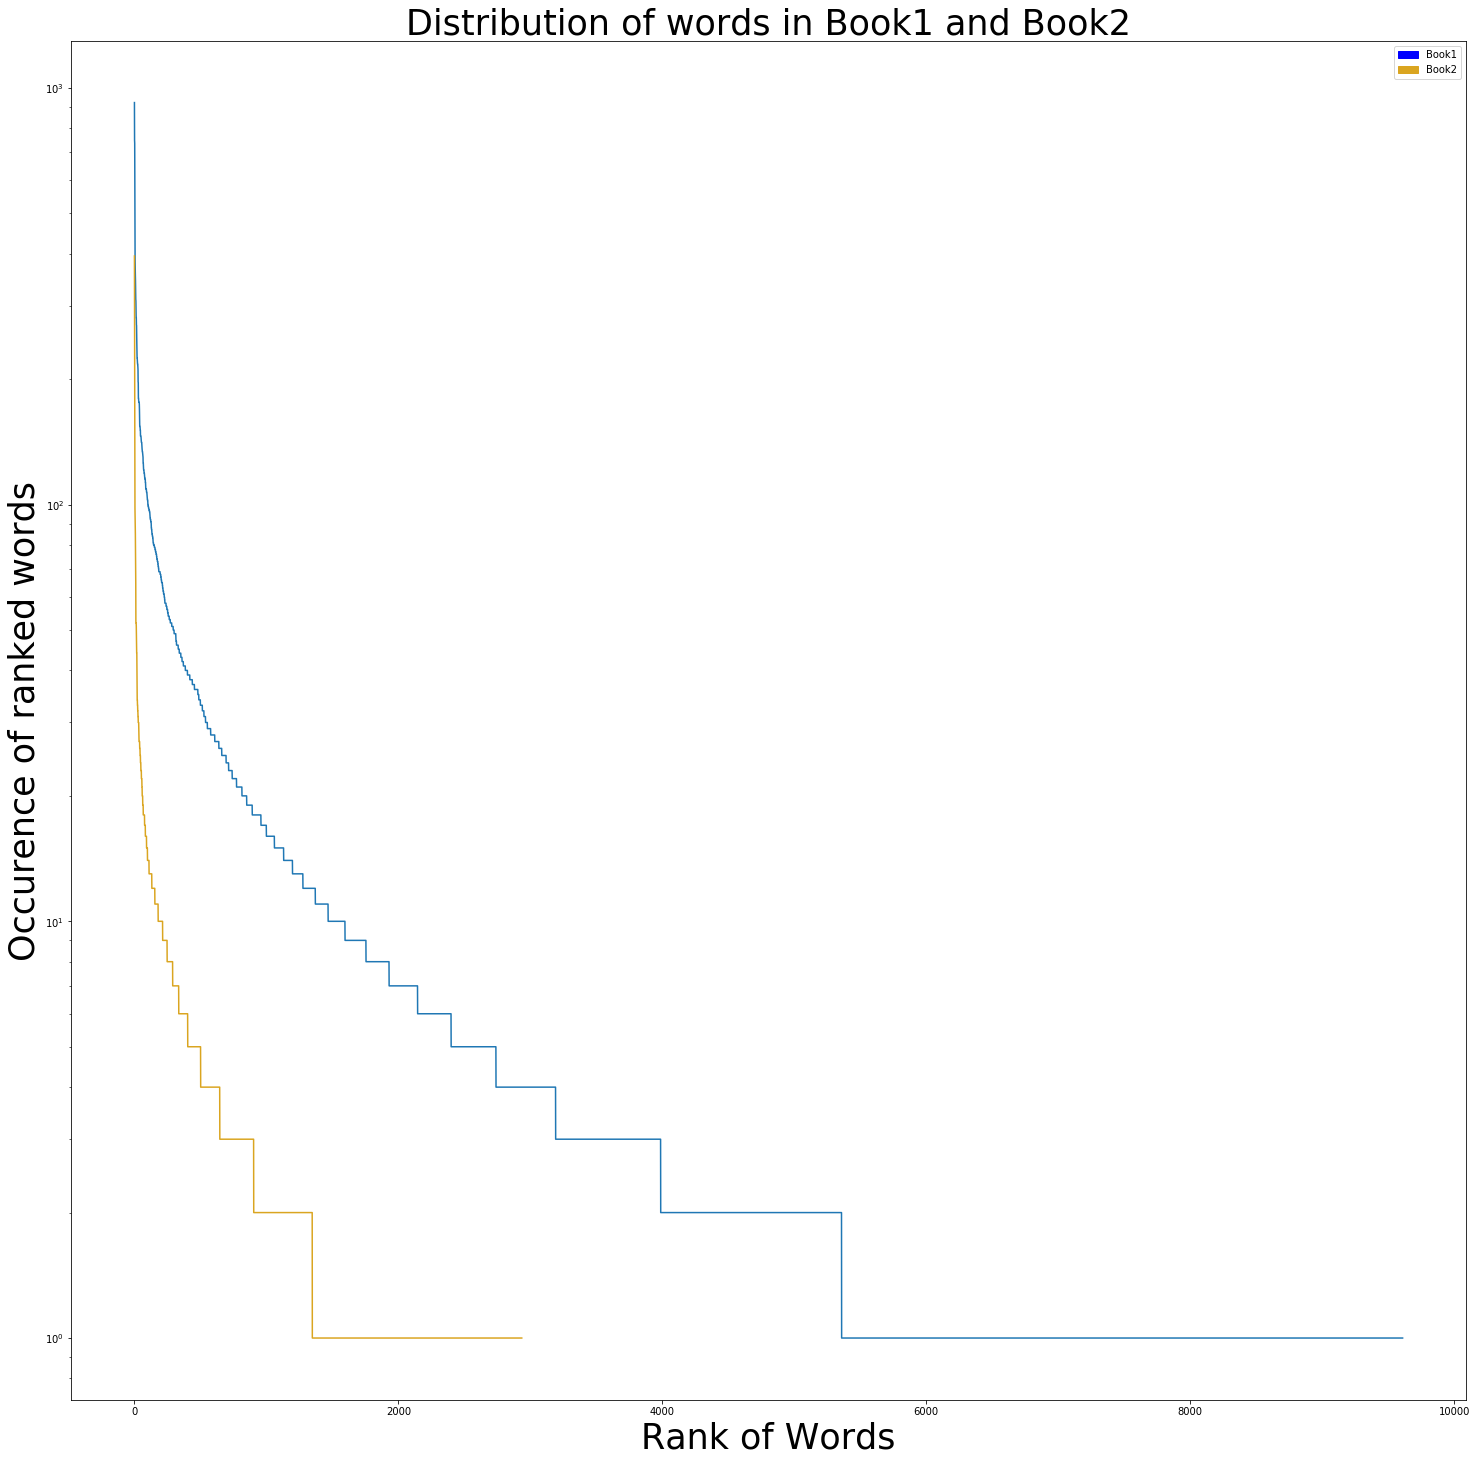

In [35]:

plt.figure(figsize=(25,25))
font = {'weight' : 'bold',
        'size'   : 15}

plt.title("Word Frequencies in book1")
plt.ylabel("Total Number of Occurrences")
plt.xlabel("Rank of word")
x_ticks=np.arange(len(filtered_words_occurence))
x_ticks2=np.arange(len(filtered_words_occurence2))


y_coords=[i for i in var_filtered]
y_coords2=[i for i in var_filtered2]
plt.plot(x_ticks,y_coords)
plt.plot(x_ticks2,y_coords2,color='#DAA520')


plt.xlabel('Rank of Words',fontsize=35)
plt.ylabel('Occurence of ranked words',fontsize=35)
plt.title('Distribution of words in Book1 and Book2',fontsize=35)

plt.yscale('log')

blue_patch = mpatches.Patch(color='blue', label='Book1')
yellow_patch = mpatches.Patch(color='#DAA520', label='Book2')

plt.legend(handles=[blue_patch,yellow_patch],loc='best', ncol=1)
plt.rc('font', **font)
plt.show()



` The ranking of the words that is the words that occurs the most frequent is ranked first so the rankings of all the words in book 1 and book 2 are on the x-axis and the occurence/frequency of the words are on the y-axis and the graph is describing how the frequnecy of the words relative to the rank of words in book1 and book2 differ.`

`The blue line is Book 1 and it shows that as the rank of the word decreases so does the frequency of the word holding the respective rank and that is consistant with both the books, as the highest occuring word's rank that is rank 1 has highest occurence and the lowest ranked word has lowest occurence.`

`The highest occuring word in both the books is related to the books basically agile ahs been repeated a lot of times in Book 1 and scrum has been repeated a lot of times in Book2 that means the topic discussed in the book is related to the title and has been used throughout the book. The length of book 1 is greater than book 2 so the measurements differ but both the books follow the same distribution, and it is heavily skewed. We used logscale to standardize the measurements for occurences as there was a high differnce in the occurences.`

#### Compare the top 15 most commonwords in Book1 and Book2. Plot the graphs and explain your understanding of the graph.

In [36]:
words1=[]
for words in filtered_words_occurence:
    words1.append(words[0])
    
top_15=words1[:15]
top_15_occurences=var_filtered[:15]
top_15

['software',
 'agile',
 'development',
 'team',
 'product',
 'work',
 'teams',
 'project',
 'developers',
 'research',
 'data',
 'process',
 'one',
 'also',
 'time']

In [37]:
words2=[]
for words in filtered_words_occurence2:
    words2.append(words[0])
    
top15_book2=words2[:15]
top15_occurences_book2=var_filtered2[:15]
top15_book2

['scrum',
 'team',
 'product',
 'sprint',
 'development',
 'teams',
 'project',
 'owner',
 'work',
 'backlog',
 'one',
 'management',
 'items',
 'software',
 'new']

In [38]:
top_15_occurences

[922, 748, 737, 554, 451, 384, 363, 354, 343, 317, 311, 308, 288, 281, 281]

In [39]:
final_labels = list()

for i in range(len(top_15)):
    final_labels.append(top_15[i])
    final_labels.append(top15_book2[i])

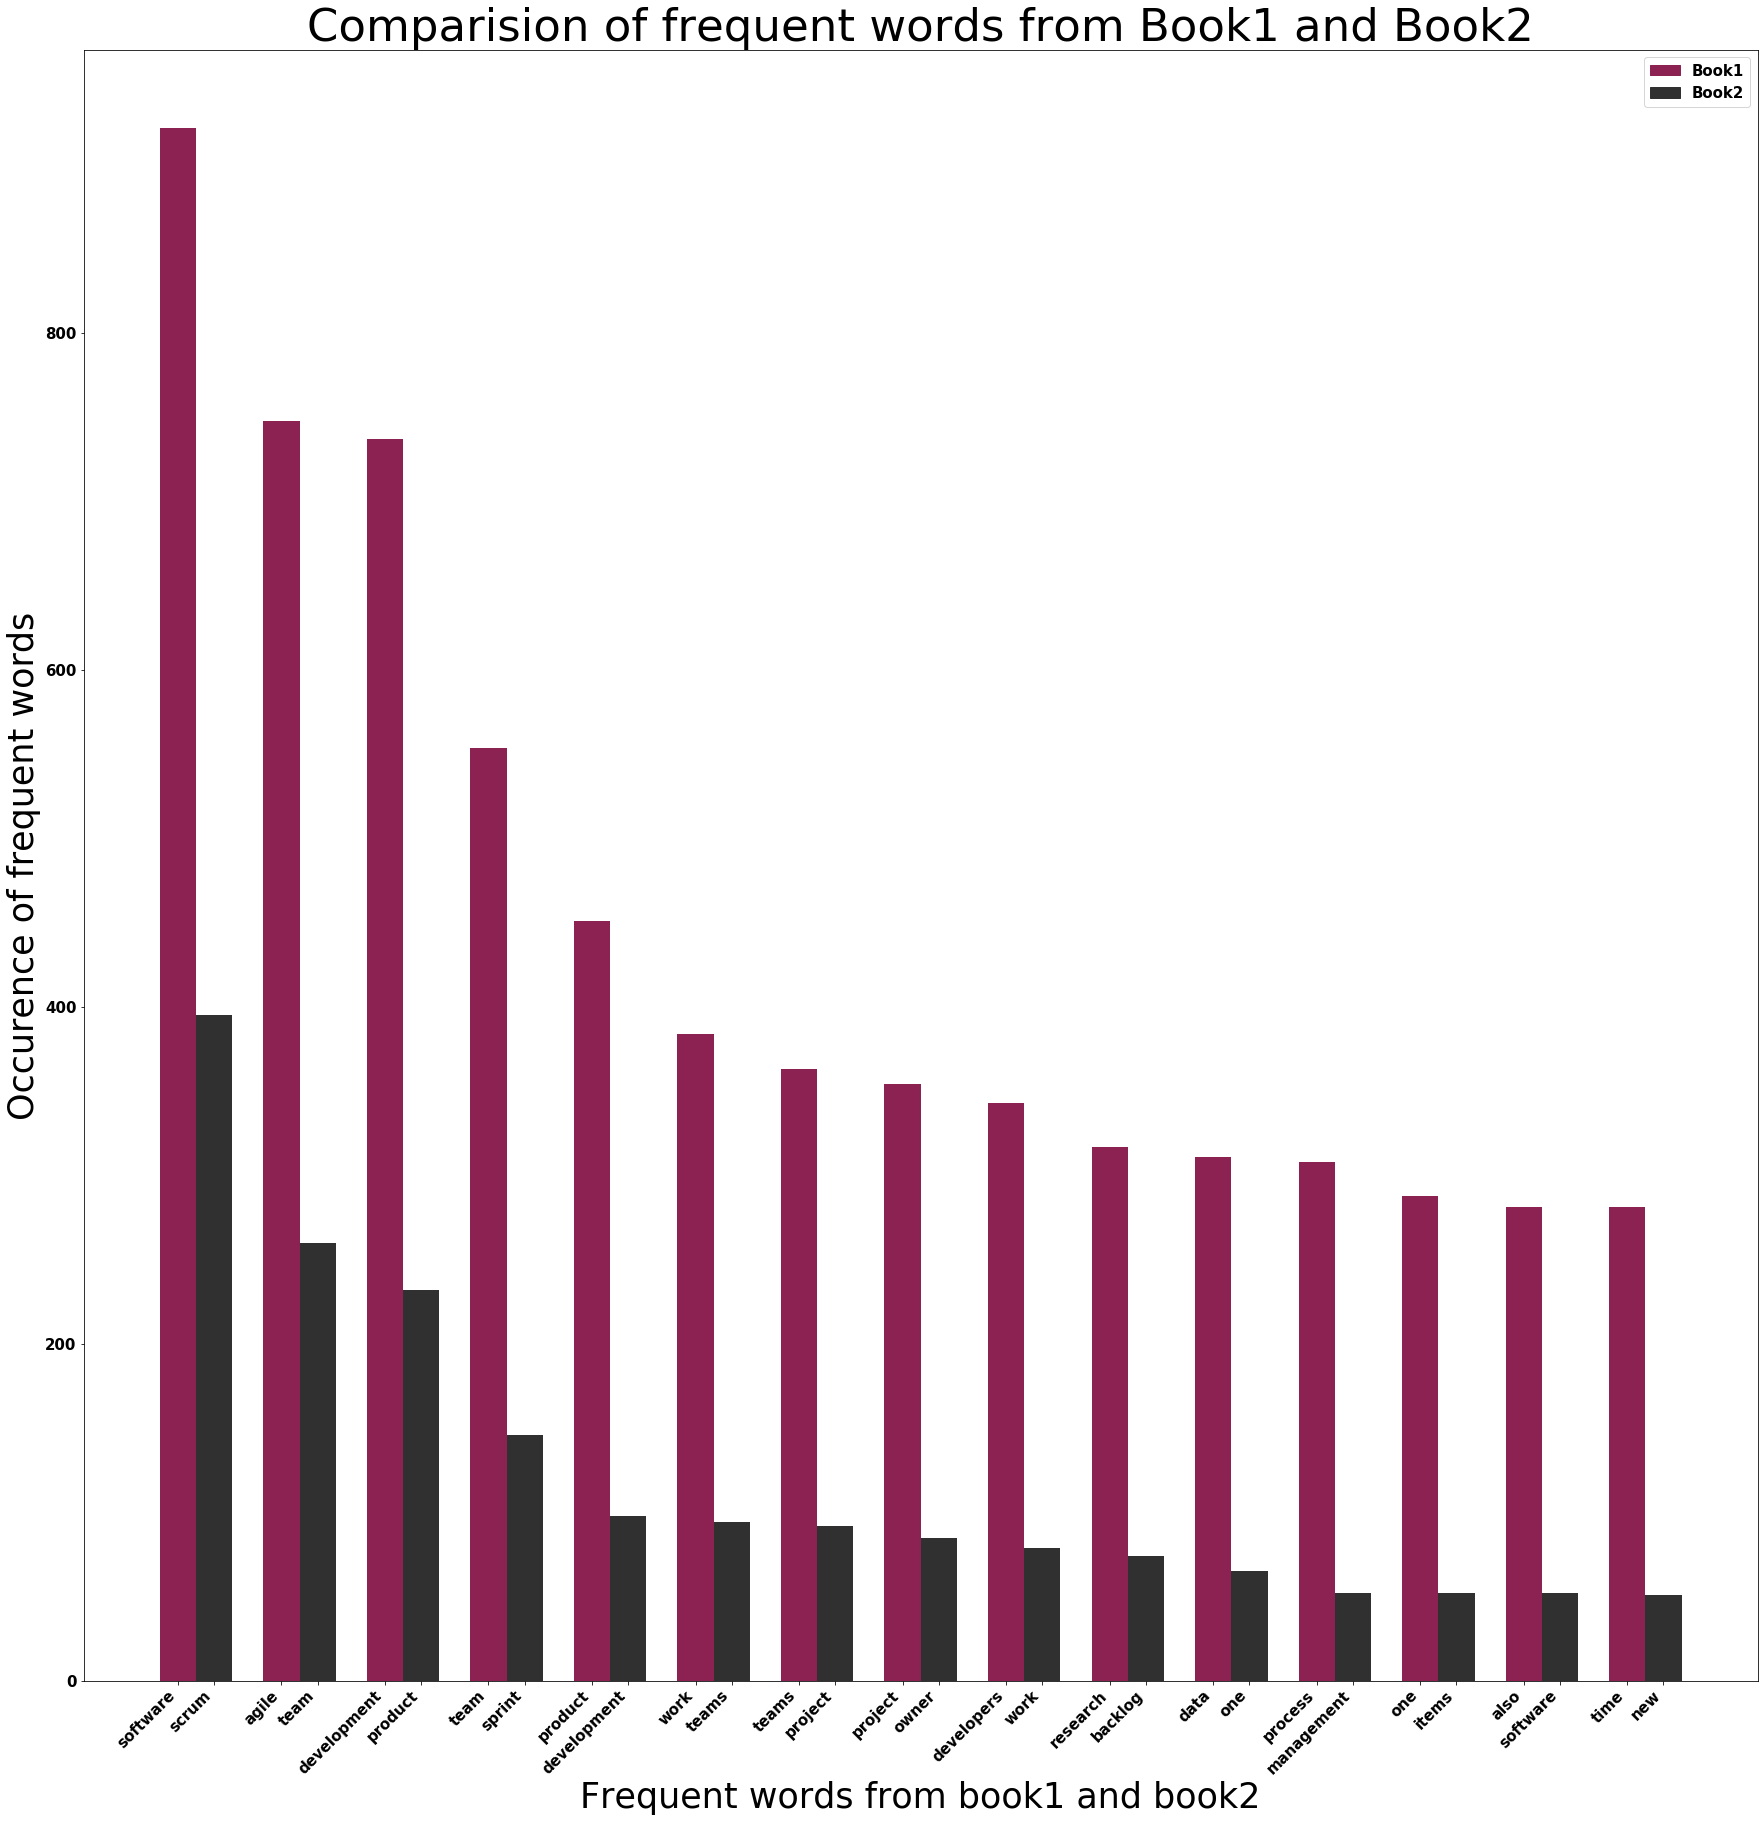

In [41]:
fig, ax = plt.subplots(figsize=(30,30))
width=0.35
font = {'weight' : 'bold',
        'size'   : 25}
y_pos = np.arange(len(top_15))

y_pos_tot = [0,0+width,1,1+width,2,2+width,3,3+width,4,4+width,5,5+width,6\
             ,6+width,7,7+width,8,8+width,9,9+width,10,10+width,11,11+width,12,12+width,\
             13,13+width,14,14+width]

plt.bar(y_pos,top_15_occurences,width,color='#8B2252')
plt.bar(y_pos+width,top15_occurences_book2,width,color='#303030')
plt.xticks(y_pos_tot, final_labels,ha='right',rotation='45')
plt.xlabel('Frequent words from book1 and book2',fontsize=35)
plt.ylabel('Occurence of frequent words',fontsize=35)
plt.title('Comparision of frequent words from Book1 and Book2',fontsize=45)


patch1 = mpatches.Patch(color='#8B2252', label='Book1')
patch2 = mpatches.Patch(color='#303030', label='Book2')

plt.legend(handles=[patch1,patch2],loc='best', ncol=1)
plt.rc('font', **font)

`Teh distribution is heavily right skewed as we discussed that the occurences decrease with the rank of words and the top 15 of both are ordered in descending order. By studying the graph it shows that Agile deals with software and agile processes and Book2 Scrum is more about teamwork and handling projects and the development of the project these are the words that occur in both texts which tells us both of them texts related to the same domain but since the length of books differ the frequency of words is different which cannot get us to a definite conclusion about the vocabulary used in the texts.`

In [ ]:
sc.stop()   #To close the spark object.